# Learning Lab 11
## Using Hybrid Machine Learning Models
<small>by Marcelo Guarido, Daniel Trad, and David Emery</small>

<br>

In this lab we will show how to create **hybrid machine learning models** using the package [mlxtend](http://rasbt.github.io/mlxtend/).

All the models used are from the package [Scikit-Learn](https://scikit-learn.org/stable/)

This lab is divided into two parts: one for regression and another for classification. And for each part a different dataset is used, both downloaded from the [sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).

* [Regression](#regression)

* [Classification](#classification)

# Regression <a class="anchor" id="regression"></a>

> #### Data Description
>
> The target variable is the median house value for California districts. This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).
>
>> ***Scikit-Learn***

Source: [Fetch California Housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)

Loading some packages and the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housingm
import warnings
warnings.filterwarnings("ignore")

Loading the data:

In [17]:
cal = fetch_california_housing(return_X_y = False, as_frame = True)
print(cal.keys())
print('HEII')
print(cal.DESCR)
print(cal)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
HEII
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California district

In [8]:
features = cal["feature_names"]
target = cal["target_names"]
print(features)
print(target)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [15]:
import pandas as pd

# Convert cal['data'] to a DataFrame
data = pd.DataFrame(cal["data"], columns=cal["feature_names"])

# Add the target as a new column
data['target'] = cal["target"]

# Display the first few rows of the DataFrame
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Regression models

For the regression, some models are tested, such as the [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html), and [Neural Networks](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), all from the `Scikit-Learn` package.

For metrics, we use the [Explained Variance Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score) and the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error).

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error

Splitting the data into `train` and `test`.

In [19]:
train, test = train_test_split(data, random_state = 0)

In [20]:
print(train.shape)
print(test.shape)

(15480, 9)
(5160, 9)


## Linear Regression

In [25]:
model_lr = LinearRegression().fit(train[features], train[target])
pred_lr = model_lr.predict(test[features])

KeyError: "None of [Index(['MedHouseVal'], dtype='object')] are in the [columns]"

In [23]:
print("LR explained variance score:", round(explained_variance_score(test[target], pred_lr), 2))
print("LR mean squared error:", round(mean_squared_error(test[target], pred_lr), 2))

KeyError: "None of [Index(['MedHouseVal'], dtype='object')] are in the [columns]"

<AxesSubplot:title={'center':'Correlation Between True Values vs Predictions'}, xlabel='pred_lr', ylabel='MedHouseVal'>

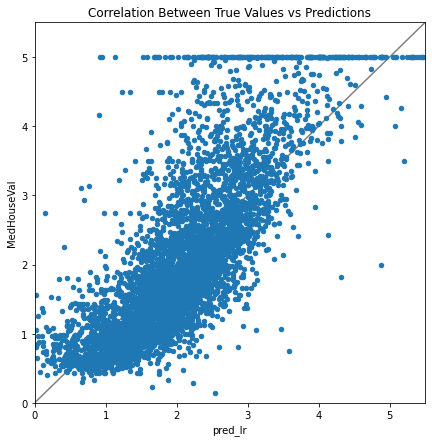

In [60]:
test["pred_lr"] = pred_lr

fig, ax = plt.subplots()

ax.plot([0,5.5], [0,5.5], "k-", alpha = 0.5, zorder = 0)
test.plot(
    x = "pred_lr", 
    y = "MedHouseVal", 
    kind = "scatter",
    figsize = (7,7), 
    title = "Correlation Between True Values vs Predictions",
    xlim = (0, 5.5),
    ylim = (0, 5.5),
    ax = ax
)

## Gradient Boosting

In [61]:
model_gbr = GradientBoostingRegressor(random_state = 0).fit(train[features], train[target])
pred_gbr = model_gbr.predict(test[features])

In [62]:
print("GBR explained variance score:", round(explained_variance_score(test[target], pred_gbr), 2))
print("GBR mean squared error:", round(mean_squared_error(test[target], pred_gbr), 2))

GBR explained variance score: 0.78
GBR mean squared error: 0.29


<AxesSubplot:title={'center':'Correlation Between True Values vs Predictions'}, xlabel='pred_gbr', ylabel='MedHouseVal'>

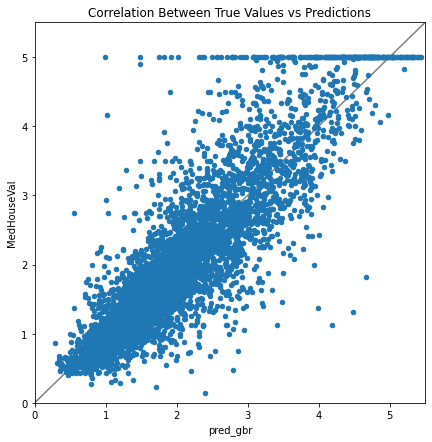

In [63]:
test["pred_gbr"] = pred_gbr

fig, ax = plt.subplots()

ax.plot([0,5.5], [0,5.5], "k-", alpha = 0.5, zorder = 0)
test.plot(
    x = "pred_gbr", 
    y = "MedHouseVal", 
    kind = "scatter",
    figsize = (7,7), 
    title = "Correlation Between True Values vs Predictions",
    xlim = (0, 5.5),
    ylim = (0, 5.5),
    ax = ax
)

## Neural Networks

NN explained variance score: 0.65
NN mean squared error: 0.46


<AxesSubplot:title={'center':'Correlation Between True Values vs Predictions'}, xlabel='pred_nnr', ylabel='MedHouseVal'>

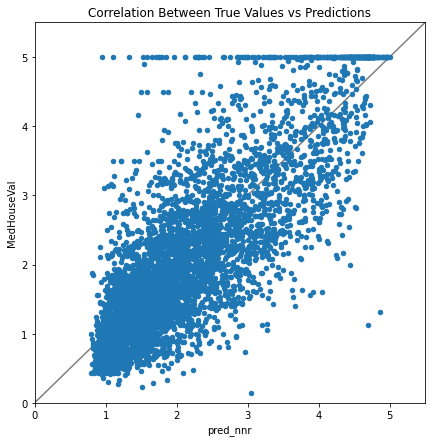

In [64]:
model_nnr = MLPRegressor(
    hidden_layer_sizes = (30,30,30),
    activation = "logistic",
    random_state = 0
).fit(train[features], train[target])

pred_nnr = model_nnr.predict(test[features])

print("NN explained variance score:", round(explained_variance_score(test[target], pred_nnr), 2))
print("NN mean squared error:", round(mean_squared_error(test[target], pred_nnr), 2))

test["pred_nnr"] = pred_nnr

fig, ax = plt.subplots()

ax.plot([0,5.5], [0,5.5], "k-", alpha = 0.5, zorder = 0)
test.plot(
    x = "pred_nnr", 
    y = "MedHouseVal", 
    kind = "scatter",
    figsize = (7,7), 
    title = "Correlation Between True Values vs Predictions",
    xlim = (0, 5.5),
    ylim = (0, 5.5),
    ax = ax
)

## Hybrid Model

With the `mlxtend` package, the regression version to create a hybrid model is the function [StackingRegressor](http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/#stackingregressor).

In [65]:
from mlxtend.regressor import StackingRegressor
from sklearn.svm import SVR

In [66]:
regressors = [model_lr, model_gbr, model_nnr]
# regressors = [model_lr, model_nnr]
svr_rbf = SVR(kernel = 'rbf')

stregr = StackingRegressor(
    regressors = regressors, 
    meta_regressor = svr_rbf
).fit(train[features], train[target])

pred_stack = stregr.predict(test[features])

print("LR explained variance score:", round(explained_variance_score(test[target], pred_lr), 2))
print("LR mean squared error:", round(mean_squared_error(test[target], pred_lr), 2))
print("-----------")
print("GBR explained variance score:", round(explained_variance_score(test[target], pred_gbr), 2))
print("GBR mean squared error:", round(mean_squared_error(test[target], pred_gbr), 2))
print("-----------")
print("NN explained variance score:", round(explained_variance_score(test[target], pred_nnr), 2))
print("NN mean squared error:", round(mean_squared_error(test[target], pred_nnr), 2))
print("-----------")
print("STACK explained variance score:", round(explained_variance_score(test[target], pred_stack),2))
print("STACK mean squared error:", round(mean_squared_error(test[target], pred_stack), 2))

LR explained variance score: 0.59
LR mean squared error: 0.54
-----------
GBR explained variance score: 0.78
GBR mean squared error: 0.29
-----------
NN explained variance score: 0.65
NN mean squared error: 0.46
-----------
STACK explained variance score: 0.78
STACK mean squared error: 0.29


<AxesSubplot:title={'center':'Correlation Between True Values vs Predictions'}, xlabel='pred_stack', ylabel='MedHouseVal'>

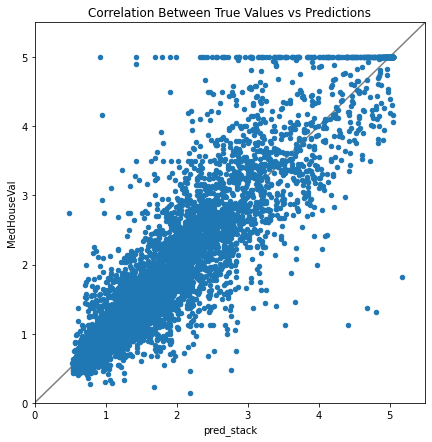

In [67]:
test["pred_stack"] = pred_stack

fig, ax = plt.subplots()

ax.plot([0,5.5], [0,5.5], "k-", alpha = 0.5, zorder = 0)
test.plot(
    x = "pred_stack", 
    y = "MedHouseVal", 
    kind = "scatter",
    figsize = (7,7), 
    title = "Correlation Between True Values vs Predictions",
    xlim = (0, 5.5),
    ylim = (0, 5.5),
    ax = ax
)

<AxesSubplot:ylabel='Frequency'>

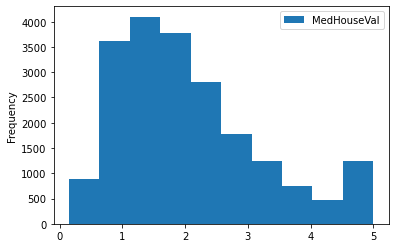

In [68]:
data[target].plot(kind = "hist")

# Classification <a class="anchor" id="classification"></a>

> #### Data Description
>
> Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, “Decision Tree Construction Via Linear Programming.” Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.
>
>> ***Scikit-Learn***

Source: [Breast Cancer Wisconsin (Diagnostic) Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

Loading some packages and the data:

In [33]:
from sklearn.datasets import load_breast_cancer

In [34]:
can = load_breast_cancer(as_frame = True)
print(can.keys())
print(can.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were c

In [35]:
features = can["feature_names"]
target = "Target"
print(features)
print(target)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target


In [36]:
data = can["data"]
data[target] = can["target"]

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:ylabel='Frequency'>

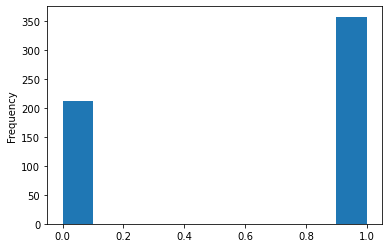

In [37]:
data["Target"].plot(kind = "hist")

## Classification models

For the regression, some models are tested, such as the [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [Neural Networks](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html), all from the `Scikit-Learn` package.

For metrics, we use the [Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and the [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [39]:
train, test = train_test_split(data, random_state = 0)

print(train.shape)
print(test.shape)

(426, 31)
(143, 31)


## Logistic Regression

LR accuracy score: 0.94


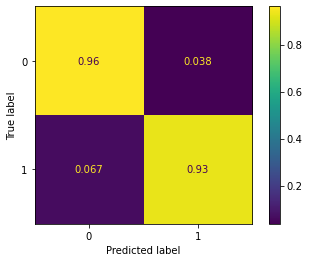

In [40]:
model_lrc = LogisticRegression(random_state = 0, class_weight = "balanced").fit(train[features], train[target])

pred_lrc = model_lrc.predict(test[features])

print("LR accuracy score:", round(accuracy_score(test[target], pred_lrc), 2))

plot_confusion_matrix(model_lrc, test[features], test[target], normalize = "true")

test["pred_lrc"] = pred_lrc

## Gradient Boosting

GBC accuracy score: 0.96


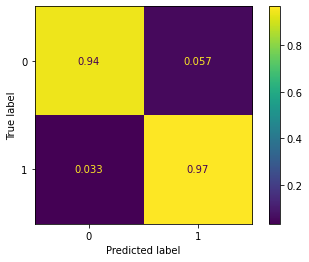

In [41]:
model_gbc = GradientBoostingClassifier(random_state = 0).fit(train[features], train[target])

pred_gbc = model_gbc.predict(test[features])

print("GBC accuracy score:", round(accuracy_score(test[target], pred_gbc), 2))

plot_confusion_matrix(model_gbc, test[features], test[target], normalize = "true")

test["pred_gbc"] = pred_gbc

## Neural Networks

NNC accuracy score: 0.94


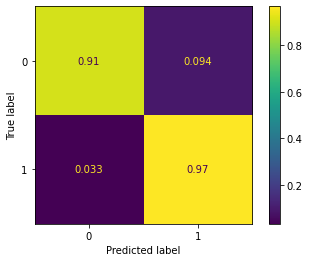

In [42]:
model_nnc = MLPClassifier(
    hidden_layer_sizes = (30,30,30),
    activation = "logistic",
    random_state = 0
).fit(train[features], train[target])

pred_nnc = model_nnc.predict(test[features])

print("NNC accuracy score:", round(accuracy_score(test[target], pred_nnc), 2))

plot_confusion_matrix(model_nnc, test[features], test[target], normalize = "true")

test["pred_nnc"] = pred_nnc

## Hybrid Model

With the `mlxtend` package, the regression version to create a hybrid model is the function [EnsembleVoteClassifier](http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/).

STACK accuracy score: 0.97


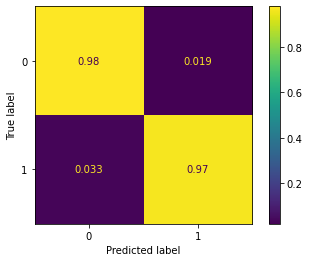

In [50]:
from mlxtend.classifier import EnsembleVoteClassifier

clfs = [model_lrc, model_gbc]

model_clfs = EnsembleVoteClassifier(
    clfs = clfs,
    voting = "soft",
    weights = [1,1],
    fit_base_estimators = False
).fit(train[features], train[target])

pred_clfs = model_clfs.predict(test[features])

print("STACK accuracy score:", round(accuracy_score(test[target], pred_clfs), 2))

plot_confusion_matrix(model_clfs, test[features], test[target], normalize = "true")

test["pred_clfs"] = pred_clfs